In [38]:
# 네이버 얼굴인식 기능 api 사용하기

# <이번에 필요한 모듈> : pillow, requests
# pillow: 파이썬에서 이미지 핸들링
# requests: http 관련 요청 처리

In [39]:
# !pip install pillow
# !pip install requests

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    # JPG 등의 이미지 파일을 다룰 수 있는 모듈

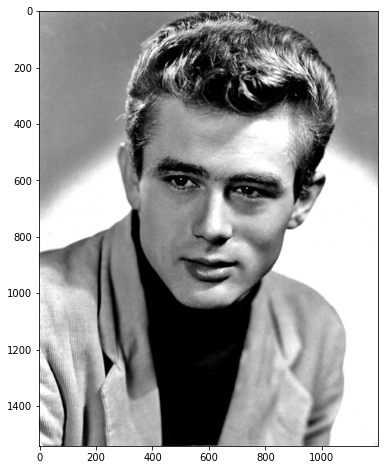

In [41]:
img = mpimg.imread('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

### 네이버 api를 사용해보자

// 유명인 얼굴 인식 API  
https://openapi.naver.com/v1/vision/celebrity

// 얼굴 감지 API  
https://openapi.naver.com/v1/vision/face

In [42]:
# 유명인 얼굴 인식 API 을 이용해보자
import requests

client_id = 'z_wzqr407Cxx_3A_6TjA'
client_secret = 'cqZ20xcmGW'

url = 'https://openapi.naver.com/v1/vision/celebrity'
files = {'image':open('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg', 'rb')}

headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret}

# 4장과 다른 점은 post 로 사진을 보내야 한다는 점
response = requests.post(url, files=files, headers=headers)

print(type(response),response)

<class 'requests.models.Response'> <Response [200]>


In [43]:
# 이제 response 에 저장돤 결과를 json으로 읽고 이 json을 dumps라는 명령을 이용해 들여쓰기하여 읽기 좋게 변환해주자
# 이 api는 한국 유명인에서 닮은 사람을 찾는다.

import json

parsed = json.loads(response.text)  # response 로 들어온 정보를 json으로 읽어오기
print(json.dumps(parsed
                 , indent=4             # 들여쓰기 정도
                 , sort_keys=False      # 키 이름으로 정렬할 것인지
                 , ensure_ascii=False)) # 아스키코드 그대로 사용할 것인지

{
    "info": {
        "size": {
            "width": 1200,
            "height": 1541
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.28751
            }
        }
    ]
}


In [44]:
# 결과는 얼굴이 1개 존재하고 정우성과 26.5% 닮았다고 반환

In [45]:
# 얼굴 감지 API 를 이용해보자
url = 'https://openapi.naver.com/v1/vision/face'
files = {'image':open('D:/nuguna_python-1/data/05_data/face_detection_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret}

response = requests.post(url, files=files, headers=headers)

print(type(response),response)

<class 'requests.models.Response'> <Response [200]>


In [46]:
parsed = json.loads(response.text)
print(json.dumps(parsed
                 , indent=4
                 , sort_keys=False
                 , ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1200,
            "height": 1541
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 368,
                "y": 488,
                "width": 539,
                "height": 539
            },
            "landmark": {
                "leftEye": {
                    "x": 499,
                    "y": 590
                },
                "rightEye": {
                    "x": 752,
                    "y": 630
                },
                "nose": {
                    "x": 603,
                    "y": 777
                },
                "leftMouth": {
                    "x": 494,
                    "y": 874
                },
                "rightMouth": {
                    "x": 713,
                    "y": 898
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

In [47]:
# "gender": {
#     "value": "male",
#     "confidence": 0.999998
# },
# "age": {
#     "value": "25~29",
#     "confidence": 0.122281
# },
# "emotion": {
#     "value": "neutral",
#     "confidence": 0.999996
# },
# "pose": {
#     "value": "frontal_face",
#     "confidence": 0.995972